In [4]:
import pandas as pd
import numpy as np

import datetime

import matplotlib.pyplot as plt

# get the data and make it nice

In [5]:
df = pd.read_excel('C:/Users/geeze/Documents/finances/ins_n_outs.xlsx')

In [10]:
df.head()

,month,year,rent,utilsCurt,utilsFair,income,cc spend,venmo,reimburse,misc corrections,note,unspent,req spend,disc spend,total ins
0,8,2013,0.0,49.5,0.0,2000.0,0.00,0.0,0.0,0.0,0,1950.50,49.5,-0.00,2000.0
1,9,2013,0.0,53.0,0.0,2000.0,0.00,0.0,0.0,0.0,0,1947.00,53.0,-0.00,2000.0
2,10,2013,0.0,23.5,0.0,2000.0,0.00,0.0,0.0,0.0,0,1976.50,23.5,-0.00,2000.0
3,11,2013,0.0,24.5,0.0,2000.0,0.00,0.0,0.0,0.0,0,1975.50,24.5,-0.00,2000.0
4,12,2013,0.0,25.5,0.0,2000.0,4.79,0.0,0.0,0.0,0,1969.71,25.5,4.79,2000.0


In [7]:
df = df.fillna(value=0)

# set up the things that are ins and things that are outs

In [11]:
def plus_minus (df):
    
    #standard stuff like income, reimbursements and the misc corrections that are right now (02/05/2020) just internet
    ins = df['income'] + df['reimburse'] + df['misc corrections']
    
    #since venmo can go pos or neg, just use it to offset negs if positive or add to negs if neg
    outs = df['venmo'] - df['utilsCurt'] - df['utilsFair'] - df['cc spend'] - df['rent']
    
    #define required spending (like living expenses)
    req_out = df['rent'] + df['utilsCurt'] + df['utilsFair']
    
    #define discretionary spending. This obviously doesn't account for like checks written and stuff
    #these untracked things are assumed to be small
    disc_out = -(df['venmo'] - df['cc spend']) #this assumes that venmo will always be less than credit card spending
    
    net = ins + outs
    
    return net, req_out, disc_out, ins

In [12]:
df['unspent'], df['req spend'], df['disc spend'], df['total ins']= plus_minus(df)

In [13]:
df

,month,year,rent,utilsCurt,utilsFair,income,cc spend,venmo,reimburse,misc corrections,note,unspent,req spend,disc spend,total ins
0,8,2013,0.0,49.500000,0.0000,2000.00,0.00,0.00,0.00,0.00,0,1950.500000,49.500000,-0.00,2000.00
1,9,2013,0.0,53.000000,0.0000,2000.00,0.00,0.00,0.00,0.00,0,1947.000000,53.000000,-0.00,2000.00
2,10,2013,0.0,23.500000,0.0000,2000.00,0.00,0.00,0.00,0.00,0,1976.500000,23.500000,-0.00,2000.00
3,11,2013,0.0,24.500000,0.0000,2000.00,0.00,0.00,0.00,0.00,0,1975.500000,24.500000,-0.00,2000.00
4,12,2013,0.0,25.500000,0.0000,2000.00,4.79,0.00,0.00,0.00,0,1969.710000,25.500000,4.79,2000.00
5,1,2014,0.0,25.000000,0.0000,2000.00,259.39,0.00,0.00,0.00,0,1715.610000,25.000000,259.39,2000.00
6,2,2014,0.0,29.000000,0.0000,2000.00,343.67,0.00,0.00,0.00,0,1627.330000,29.000000,343.67,2000.00
7,3,2014,0.0,29.415000,0.0000,2000.00,237.71,0.00,0.00,0.00,0,1732.875000,29.415000,237.71,2000.00
8,4,2014,0.0,11.761667,0.0000,2000.00,288.67,0.00,0.00,0.00,0,1699.568333,11.761667,288.67,2000.00
9,5,2014,0.0,35.996667,0.0000,2000.00,182.03,0.00,0.00,0.00,0,1781.973333,35.996667,182.03,2000.00


In [14]:
def make_dtime (df):

    date_info = df.loc[:, ['month', 'year']]
    
    date_info['day'] = 1
        
    date = pd.to_datetime(date_info)
    
    return date

In [15]:
df['date'] = make_dtime(df)

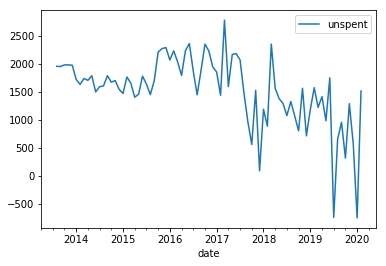

In [17]:
### absolute unspent money
df.plot(x='date', y='unspent')

In [18]:
### total saved cash over whole time

df['unspent'].sum()

120824.21833333005

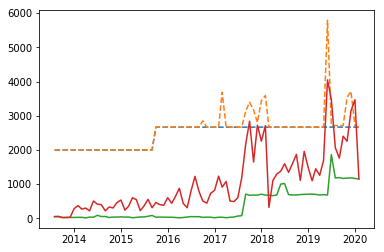

In [20]:
### ABSOLUTE SPENDING VS INFLOW

#put income on there
plt.plot(df['date'], df['income'], '--')

#put income plus other sources of money that month on there
plt.plot(df['date'], df['total ins'], '--')

#now add required spending
plt.plot(df['date'], df['req spend'])

#now add discretionary spending above required.
plt.plot(df['date'], df['req spend']+df['disc spend'])




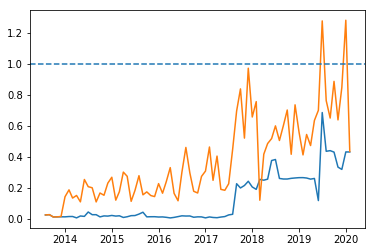

In [21]:
### SPENDING AS PERCENT OF INFLOW

#required spending as percentage of total inflow
plt.plot(df['date'], df['req spend'] / df['total ins'])

#now add discretionary spending above required as percentage of total inflow
plt.plot(df['date'], (df['req spend']+df['disc spend']) / df['total ins'])

plt.axhline(1, linestyle = '--')

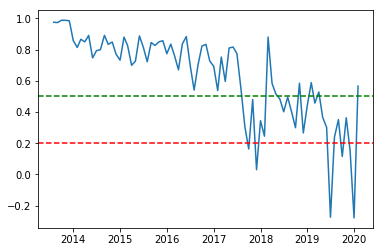

In [23]:
### PERCENT OF INFLOW SAVED

plt.plot(df['date'], df['unspent'] / df['total ins'])

plt.axhline(0.2, color='r',linestyle='--')
plt.axhline(0.5, color='g', linestyle='--')

In [34]:
### MEAN SAVINGS BEFORE AND AFTER A CERTAIN DATE, PERCENT OF INFLOW

#set date
d = datetime.datetime(2019, 10, 1)

i = df['date'] >= d

#amounts unspend AFTER date d
not_spent_after_d = df.loc[i, 'unspent']
             
#total amounts in AFTER date d
all_in_after_d = df.loc[i, 'total ins']
             
print('The mean percent of inflow saved after ', d, ' is ', 100*(not_spent_after_d / all_in_after_d).mean())

The mean percent of inflow saved after  2019-10-01 00:00:00  is  18.367654555779644


In [43]:
### absolute savings before or after a certain date

#set date
d = datetime.datetime(2020, 1, 1)

i = df['date'] >= d

#if 1, you want the total AFTER date d, 0 means you want total from beginning UP TO date d (before)
after = 0

if after == 1:
    pass
    word = ' from {} until present:'.format(d)
else:
    i = ~i
    word = ' from start until {}:'.format(d)


#sum up the unspent monies before or after date d. Use the ~ operator to determine before or after
# ~ makes it the sum from the beginning up until date d, regular means after date d
print('You have saved this much', word, df.loc[i, 'unspent'].sum())

You have saved this much  from start until 2020-01-01 00:00:00: 120071.51083333003
